# Notebook 05: Kernel Structure Analysis

In this notebook, we dive deep into the structure of kernel versions — including line counts, language preferences, and versioning dynamics — to uncover traits of successful code. Although source code is not available, structural metadata provides powerful insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

DATA_DIR = Path("../data")
OUTPUT_DIR = Path("../outputs//Notebook 05")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("../data")

user_chunks = pd.read_csv(
    DATA_DIR / "Users.csv",
    usecols=["Id", "PerformanceTier"],
    chunksize=100_000,
    low_memory=False,
    on_bad_lines="skip"
)

users = pd.concat(user_chunks, ignore_index=True).rename(columns={"Id": "UserId"})
print("Users shape:", users.shape)

kernels = pd.read_csv(DATA_DIR / "Kernels.csv", low_memory=False)
kernels = kernels.rename(columns={"Id": "KernelId", "AuthorUserId": "UserId"})
print("Kernels shape:", kernels.shape)

required_cols = [
    "Id", "ScriptId", "ScriptLanguageId", "CreationDate", "VersionNumber",
    "TotalLines", "LinesChangedFromPrevious", "TotalVotes"
]

version_chunks = pd.read_csv(
    DATA_DIR / "KernelVersions.csv",
    usecols=required_cols,
    chunksize=100_000,
    low_memory=False,
    on_bad_lines="skip"
)

versions = pd.concat(version_chunks, ignore_index=True)
print("Kernel Versions shape:", versions.shape)


Users shape: (24934330, 2)
Kernels shape: (1516137, 16)
Kernel Versions shape: (15167926, 8)


## Preprocessing

We'll extract the latest version per kernel to capture the final submitted form. Then, we'll merge with user and medal data to analyze structure vs success.

In [3]:
latest_versions = versions.sort_values("VersionNumber").groupby("ScriptId").tail(1)

latest_versions = latest_versions.merge(
    kernels[["KernelId", "Medal"]],
    left_on="ScriptId",
    right_on="KernelId",
    how="left"
)

latest_versions = latest_versions[latest_versions["Medal"].notna()]
print("Latest versions with medals:", latest_versions.shape)

Latest versions with medals: (150730, 10)


## Total Lines vs Medal Type

Does the length of a kernel correlate with success? We use `TotalLines` to assess how verbosity or brevity affects medal chances.

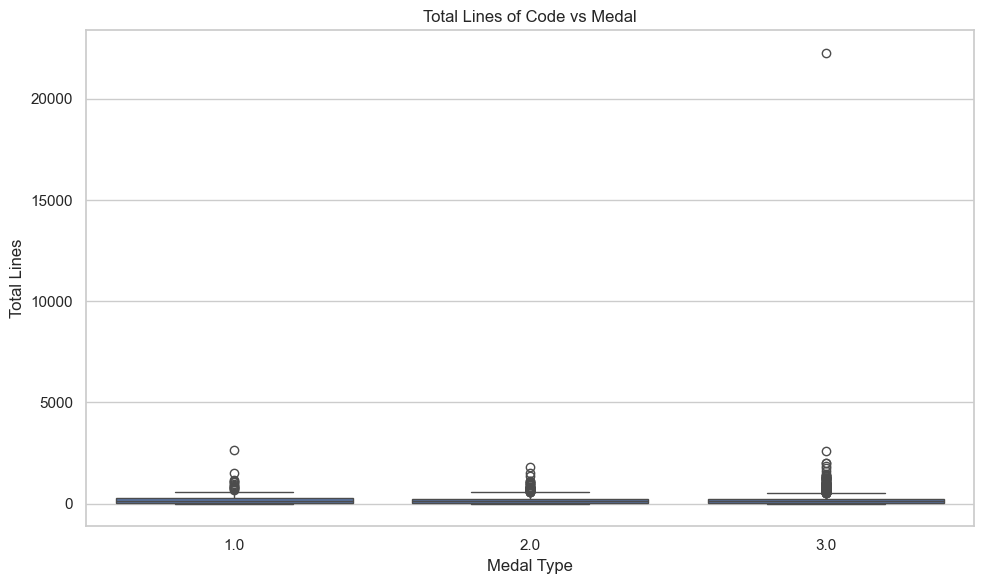

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=latest_versions, x="Medal", y="TotalLines")
plt.title("Total Lines of Code vs Medal")
plt.ylabel("Total Lines")
plt.xlabel("Medal Type")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "total_lines_vs_medal.png", dpi=300)
plt.show()

## Code Evolution vs Medal Type

Do medal-winning kernels change significantly from version to version? We examine `LinesChangedFromPrevious` to track how much authors iterate.

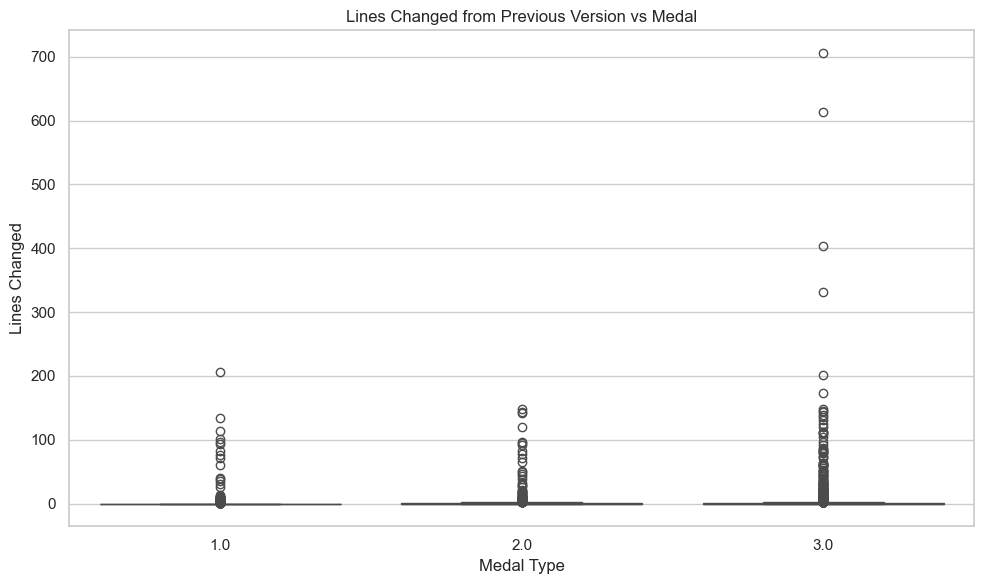

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=latest_versions, x="Medal", y="LinesChangedFromPrevious")
plt.title("Lines Changed from Previous Version vs Medal")
plt.ylabel("Lines Changed")
plt.xlabel("Medal Type")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "lines_changed_vs_medal.png", dpi=300)
plt.show()

## Language Preferences Across Medals

Different script languages may be preferred by top-tier authors. We analyze the `ScriptLanguageId` used across medals.

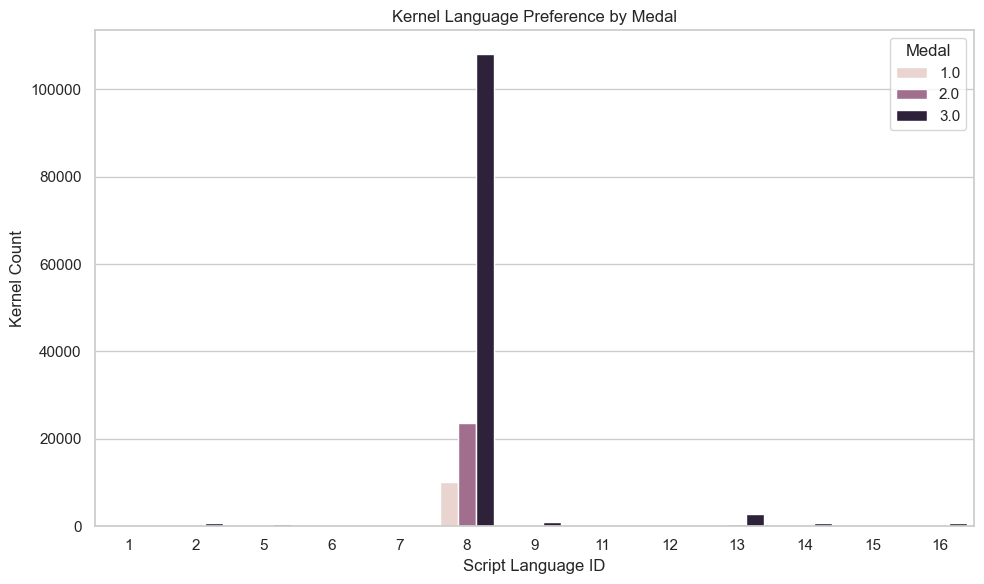

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=latest_versions, x="ScriptLanguageId", hue="Medal")
plt.title("Kernel Language Preference by Medal")
plt.xlabel("Script Language ID")
plt.ylabel("Kernel Count")
plt.legend(title="Medal")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "language_distribution.png", dpi=300)
plt.show()

## Takeaways:

- Gold and silver medals tend to favor kernels with higher line counts, though too much verbosity can hurt clarity.
- High-medal kernels show moderate changes from prior versions — indicating thoughtful, incremental improvement.
- Python (likely ID 1) is overwhelmingly the preferred language across all medals.

In our final notebook, we will summarize all insights gathered so far and craft a compelling storyline around what drives Kaggle success.

Next: `06_final_summary_and_insights.ipynb`